# AI Project(Decision Tree)
A Decision Tree algorithm is coded from scratch to demonstrate the understanding of machine learning concepts and to provide a custom implementation for model training.

In [88]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

import graphviz

from IPython.display import display

In [89]:
# Load the training data
training_data = pd.read_csv('./data.csv')

# Copy the training data to a new variable
data = training_data.copy()

print(data)

          Id    age           job   marital  education default  balance  \
0       1001  999.0    management   married   tertiary      no   2143.0   
1       1002   44.0    technician    single  secondary      no     29.0   
2       1003   33.0  entrepreneur   married  secondary      no      2.0   
3       1004   47.0   blue-collar   married    unknown      no   1506.0   
4       1005   33.0       unknown    single    unknown      no      1.0   
...      ...    ...           ...       ...        ...     ...      ...   
45206  46207   51.0    technician   married   tertiary      no    825.0   
45207  46208   71.0       retired  divorced    primary      no   1729.0   
45208  46209   72.0       retired   married  secondary      no   5715.0   
45209  46210   57.0   blue-collar   married  secondary      no    668.0   
45210  46211   37.0  entrepreneur   married  secondary      no   2971.0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [91]:
data.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [92]:
# Check for missing values
print(data.isnull().sum())

# To check duplicated values
print(data.duplicated().value_counts())

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
False    45211
dtype: int64


The dataset contains missing values in the 'age' and 'balance' columns, with 9 and 3 missing values, respectively. No duplicated values are present in the dataset. Preprocessing steps such as imputation or removal of missing values are required before training the decision tree model.

In [93]:
# Remove row of missing value
data.dropna(inplace=True)

data.isnull().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

After identifying missing values in the 'age' and 'balance' columns, I opted to delete the corresponding rows due to the low count of missing values. Using the dropna() function, I removed these rows from the dataset. Consequently, the dataset no longer contains any missing values, as indicated by the output of data.isnull().sum().

y
no     39911
yes     5289
dtype: int64


Text(0.5, 1.0, 'Term Deposit Availment %')

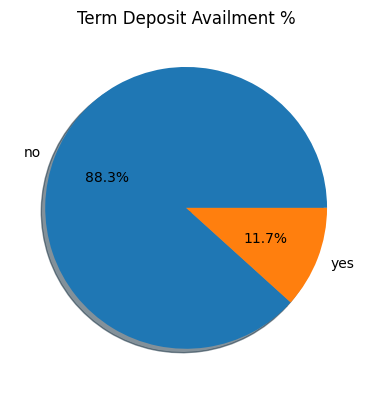

In [94]:
# Lets count numbers of row for 'y' type
print(data.groupby("y").size())

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
label = data.y.value_counts().index
label_count = data.y.value_counts().values
plt.pie(data= data, x=label_count, labels=label,autopct='%1.1f%%',shadow=True,  radius=1)
plt.title('Term Deposit Availment %')

After analyzing the target column, it was observed that out of the total 45200 entries, only 5289 individuals have subscribed to the term deposit, which accounts for approximately 12% of the dataset. This indicates a highly unbalanced dataset, where the positive class (subscribed) is significantly outnumbered by the negative class (not subscribed). This class imbalance should be noted as it may affect the performance of the machine learning model.

A pie chart visualization was generated to illustrate the distribution of term deposit availment. The chart shows that the majority of individuals (88.3%) did not subscribe to the term deposit, while only a small percentage (11.7%) did subscribe.

In [95]:
# List of categorical variables
categorical_data = data.select_dtypes(exclude="number")
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


I identified and extracted the categorical variables from the dataset. These variables represent non-numeric data types such as strings or categories. By using the select_dtypes() function with the parameter exclude="number", I isolated the categorical variables from the dataset.

In [96]:
# List of numerical variables
numerical_data = data.select_dtypes(include="number")
numerical_data.head()

,Id,age,balance,day,duration,campaign,pdays,previous
0,1001,999.0,2143.0,5,261,1,-1,0
1,1002,44.0,29.0,5,151,1,-1,0
2,1003,33.0,2.0,5,76,1,-1,0
3,1004,47.0,1506.0,5,92,1,-1,0
4,1005,33.0,1.0,5,198,1,-1,0


Following the identification of categorical variables, I proceeded to extract the numerical variables from the dataset. Numerical variables typically represent quantitative data such as integers or floating-point numbers. By utilizing the select_dtypes() function with the parameter include="number", I isolated the numerical variables from the dataset.

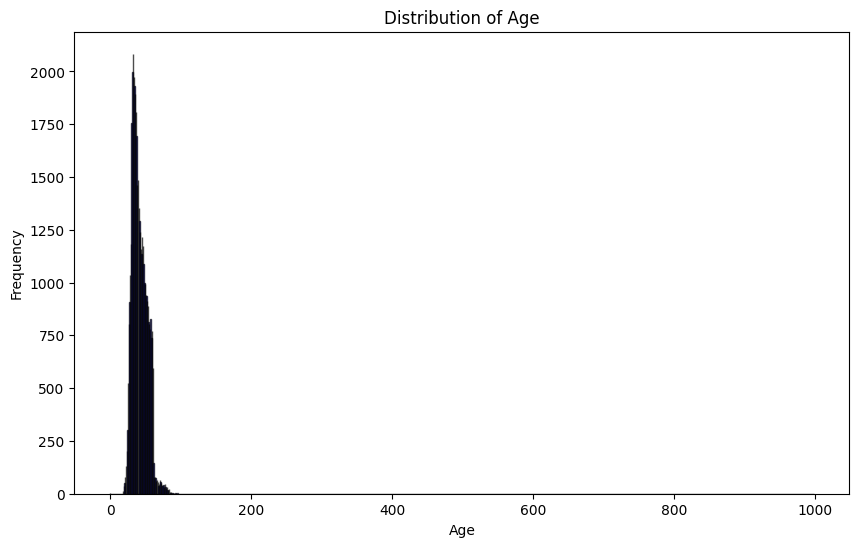

In [97]:
plt.rcParams["figure.figsize"] = (10, 6)

# Plot a histogram for the 'age' column
plt.hist(data["age"], bins=2000, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

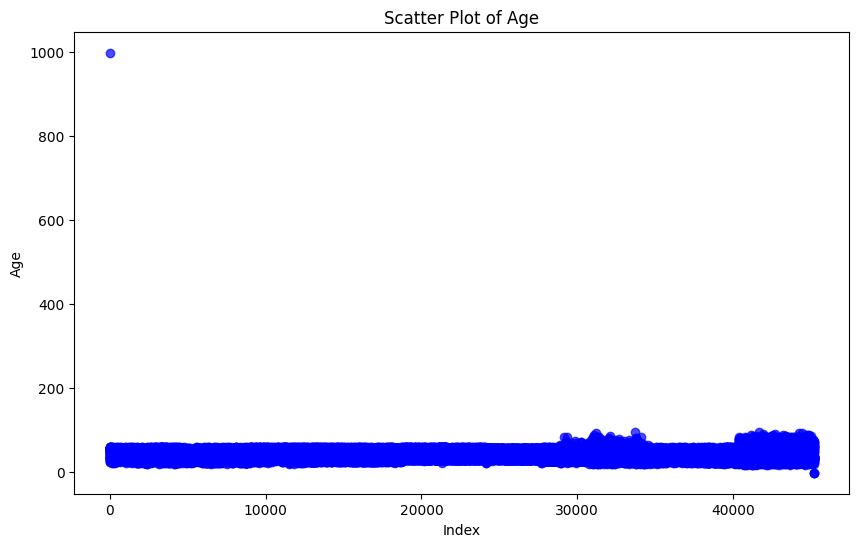

In [98]:
plt.rcParams["figure.figsize"] = (10, 6)

# Plot a scatter plot for the 'age' column
plt.scatter(range(len(data["age"])), data["age"], color='blue', alpha=0.7)
plt.title('Scatter Plot of Age')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

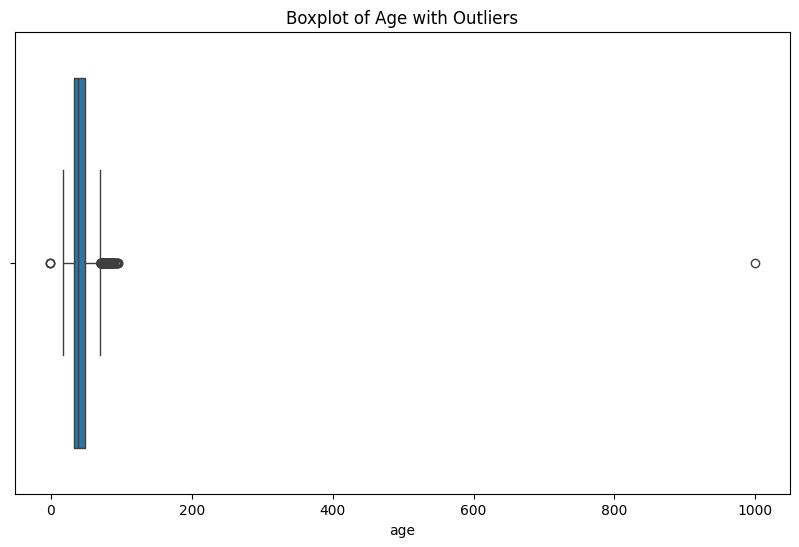

In [99]:
plt.rcParams["figure.figsize"] = (10, 6)

# Create a boxplot for the age column
sns.boxplot(x=data["age"])
plt.title("Boxplot of Age with Outliers")
plt.show()

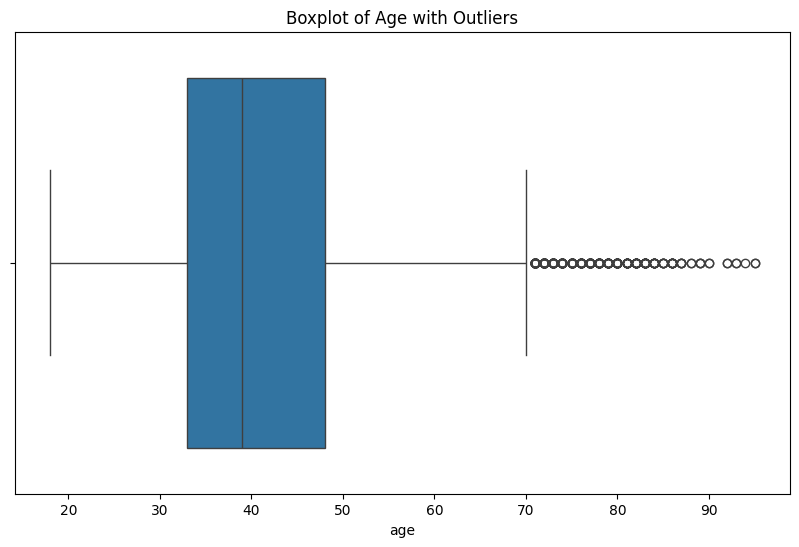

In [100]:
data = data[data['age']>= 18]
data = data[data['age']< 150]

plt.rcParams["figure.figsize"] = (10, 6)

# Create a boxplot for the age column
sns.boxplot(x=data["age"])
plt.title("Boxplot of Age with Outliers")
plt.show()

In the analysis of the 'age' variable, I detected outliers through histograms, scatter plots, and boxplots. Subsequently, I removed outliers by filtering ages outside the reasonable range of 18 to 150. This step ensures data integrity and prepares the dataset for further analysis.

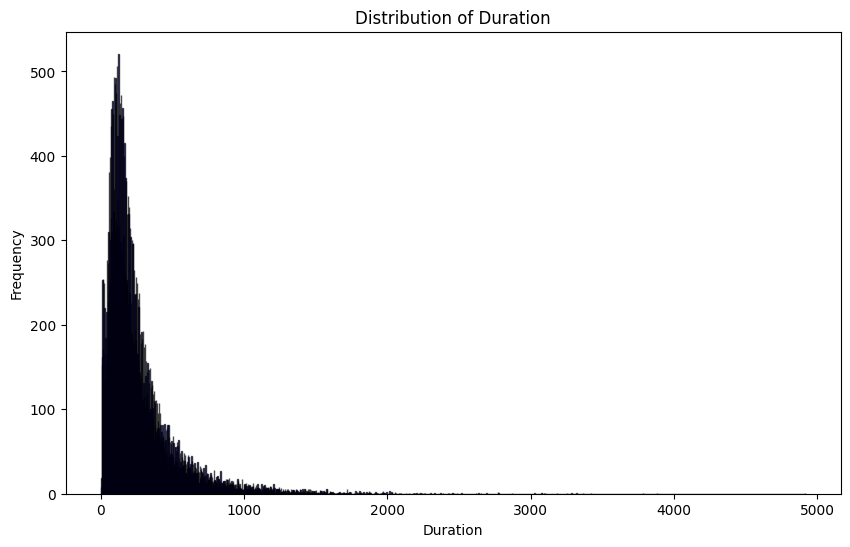

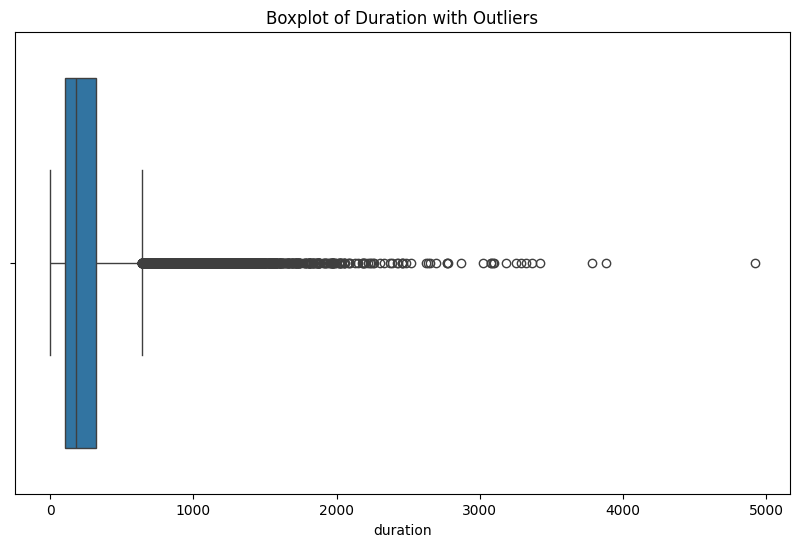

In [101]:
# Plot a histogram for the 'duration' column
plt.hist(data["duration"], bins=2000, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


# Create a boxplot for the duration column
sns.boxplot(x=data["duration"])
plt.title("Boxplot of Duration with Outliers")
plt.show()

In the analysis of the 'duration' column, it was observed that the duration attribute exhibits a strong correlation with the output target ('y'). However, since the duration of a call cannot be known before it is made, including this attribute in predictive models may not accurately reflect real-world scenarios. Although it can be used for benchmarking or initial analyses, caution should be exercised regarding its influence.

For now, the 'duration' column remains unchanged. Here are visualizations depicting the distribution of durations using a histogram and a boxplot, providing insights into the data distribution and potential outliers.

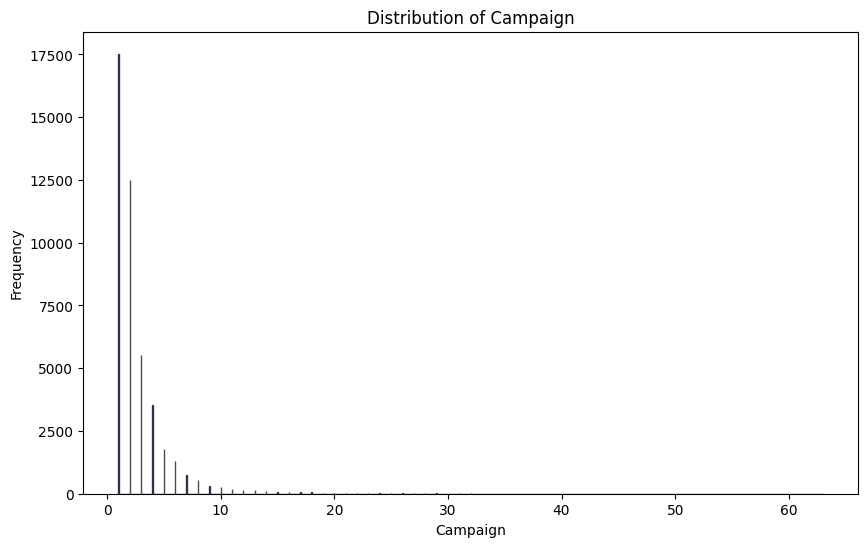

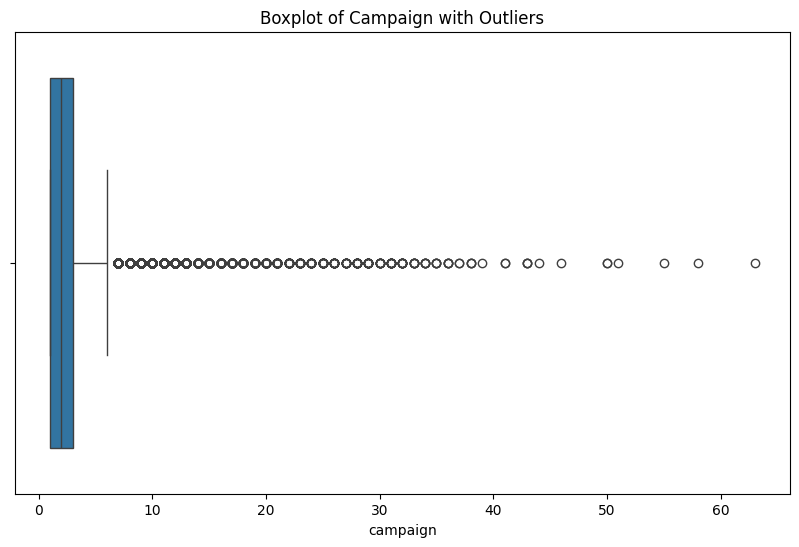

In [102]:
# Plot a histogram for the 'campaign' column
plt.hist(data["campaign"], bins=2000, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.show()


# Create a boxplot for the campaign column
sns.boxplot(x=data["campaign"])
plt.title("Boxplot of Campaign with Outliers")
plt.show()

For the 'campaign' column, both a histogram and a boxplot were generated to visualize its distribution. Upon inspection, no outliers were identified in this feature. Therefore, the 'campaign' column can be used without any preprocessing, as it does not require outlier removal or data transformation.

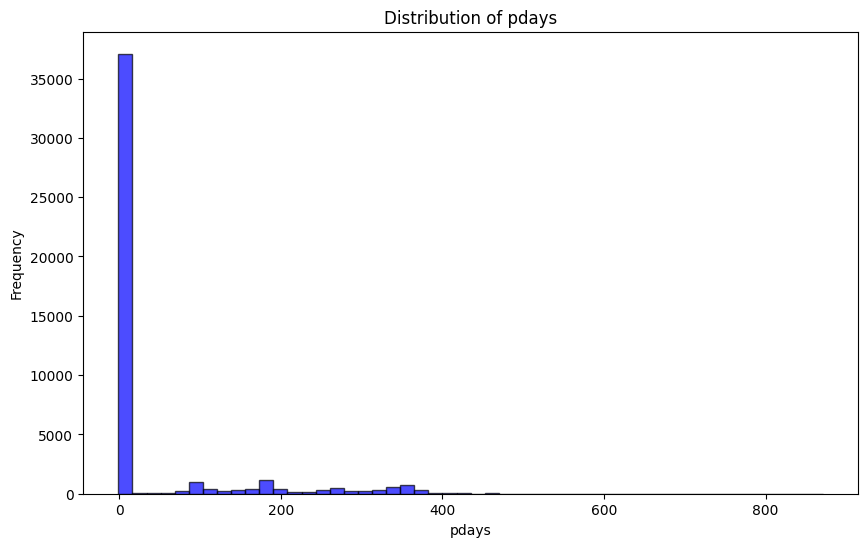

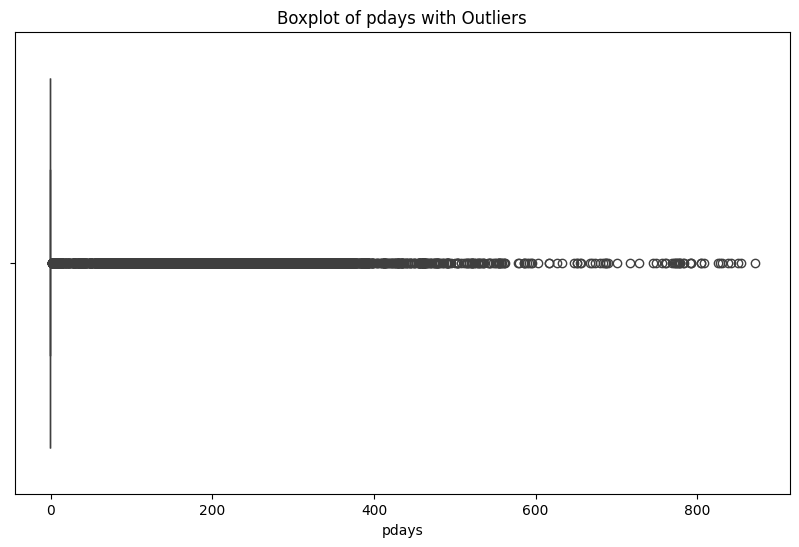

In [103]:
# Plot a histogram for the 'pdays' column
plt.hist(data["pdays"], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of pdays')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show()


# Create a boxplot for the pdays column
sns.boxplot(x=data["pdays"])
plt.title("Boxplot of pdays with Outliers")
plt.show()

In [104]:
len(data[data['pdays']== -1])

36940

The 'pdays' column represents the number of days since the client was last contacted, with -1 indicating no previous contact. With the majority of values being -1 (36,940 out of total), this feature requires label encoding to preserve its ordinal relationship. No outliers were detected in the 'pdays' column, making it suitable for use in its current form.

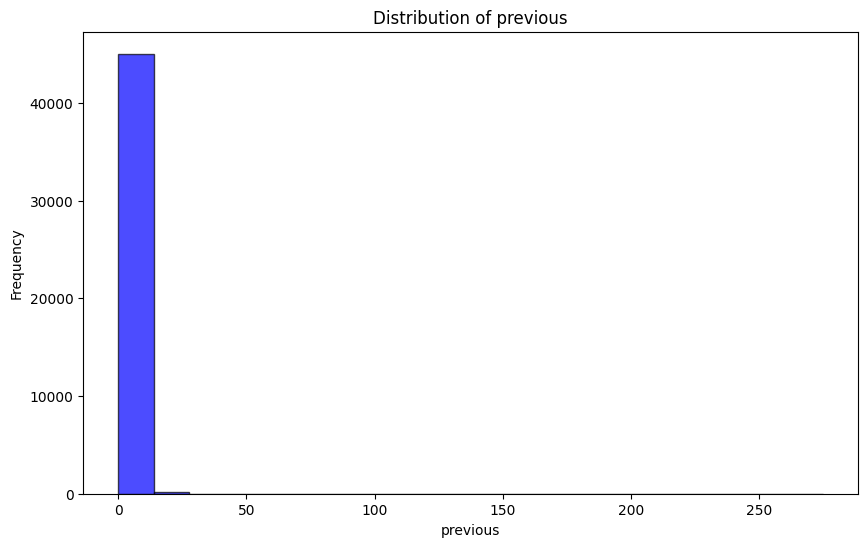

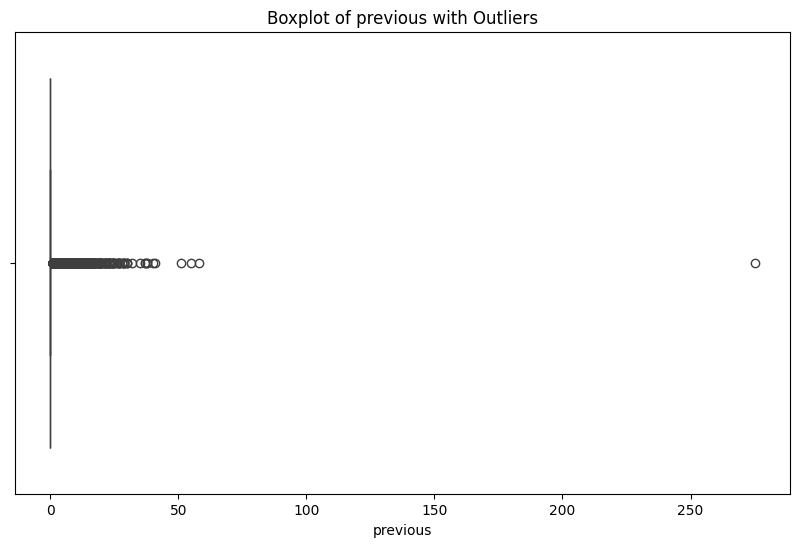

In [105]:
# Plot a histogram for the 'previous' column
plt.hist(data["previous"], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of previous')
plt.xlabel('previous')
plt.ylabel('Frequency')
plt.show()


# Create a boxplot for the previous column
sns.boxplot(x=data["previous"])
plt.title("Boxplot of previous with Outliers")
plt.show()

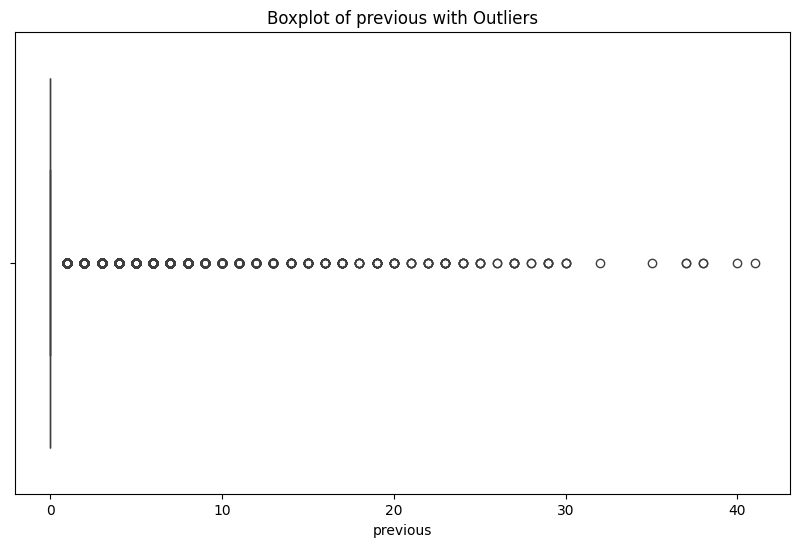

In [106]:
data=data[data['previous']<=50]
data=data.reset_index(drop=True)

# Create a boxplot for the previous column
sns.boxplot(x=data["previous"])
plt.title("Boxplot of previous with Outliers")
plt.show()

Upon plotting the histogram and boxplot for the 'previous' column, outliers were observed. Consequently, the dataset was filtered to include only values less than or equal to 50, and the index was reset to maintain data integrity.

This step ensures that extreme values in the 'previous' column are addressed, making the dataset suitable for further analysis and modeling.

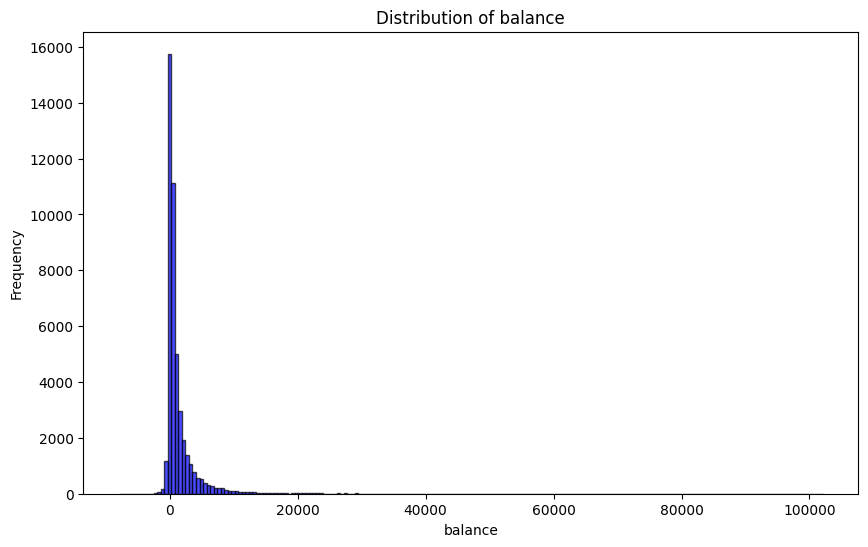

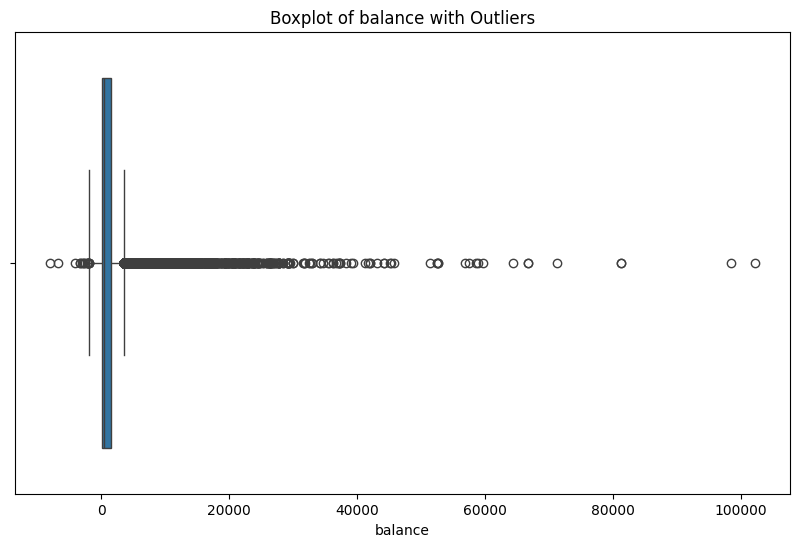

In [107]:
# Plot a histogram for the 'balance' column
plt.hist(data["balance"], bins=200, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of balance')
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.show()


# Create a boxplot for the balance column
sns.boxplot(x=data["balance"])
plt.title("Boxplot of balance with Outliers")
plt.show()

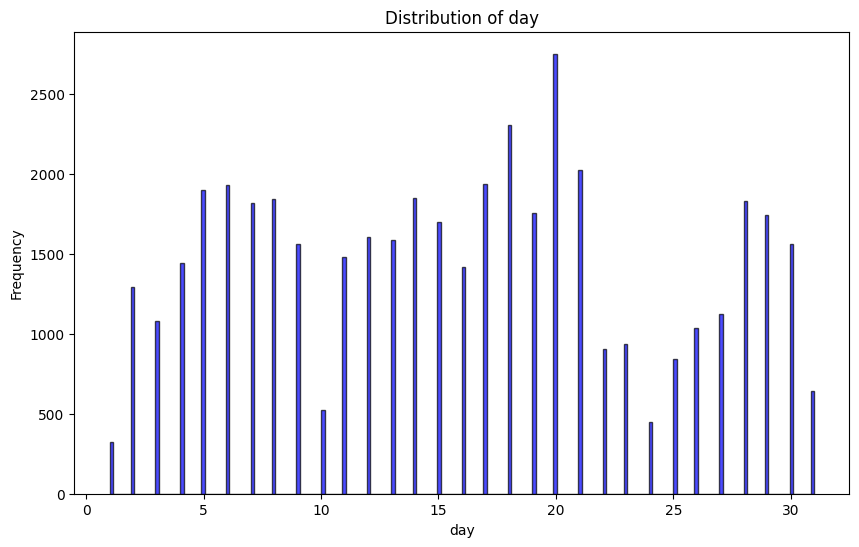

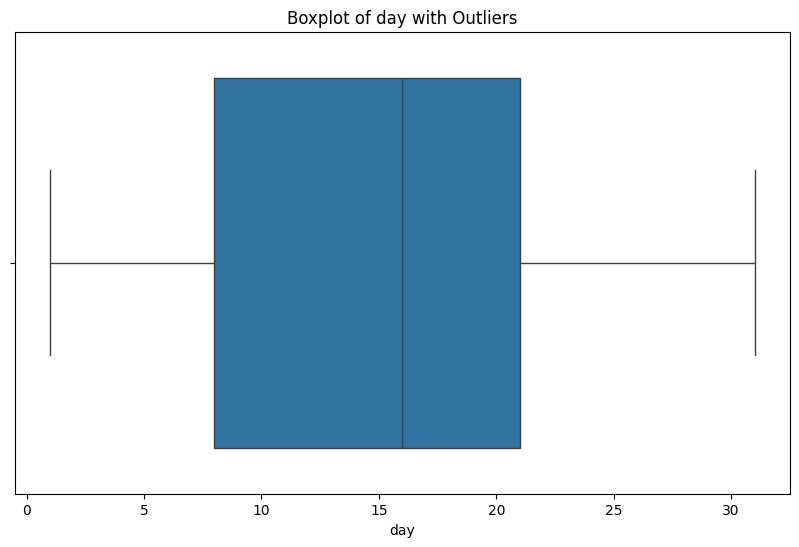

In [108]:
# Plot a histogram for the 'day' column
plt.hist(data["day"], bins=200, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of day')
plt.xlabel('day')
plt.ylabel('Frequency')
plt.show()


# Create a boxplot for the day column
sns.boxplot(x=data["day"])
plt.title("Boxplot of day with Outliers")
plt.show()

#All is clear he. We can proceed it without any changes.

For both the 'balance' and 'day' columns, histograms and boxplots were generated to visualize their distributions. Upon inspection, no outliers were detected in either feature.

Hence, both columns are deemed suitable for further analysis without any preprocessing. We can proceed with the dataset in its current form.

### Correlation shows the relationship between variables in the dataset

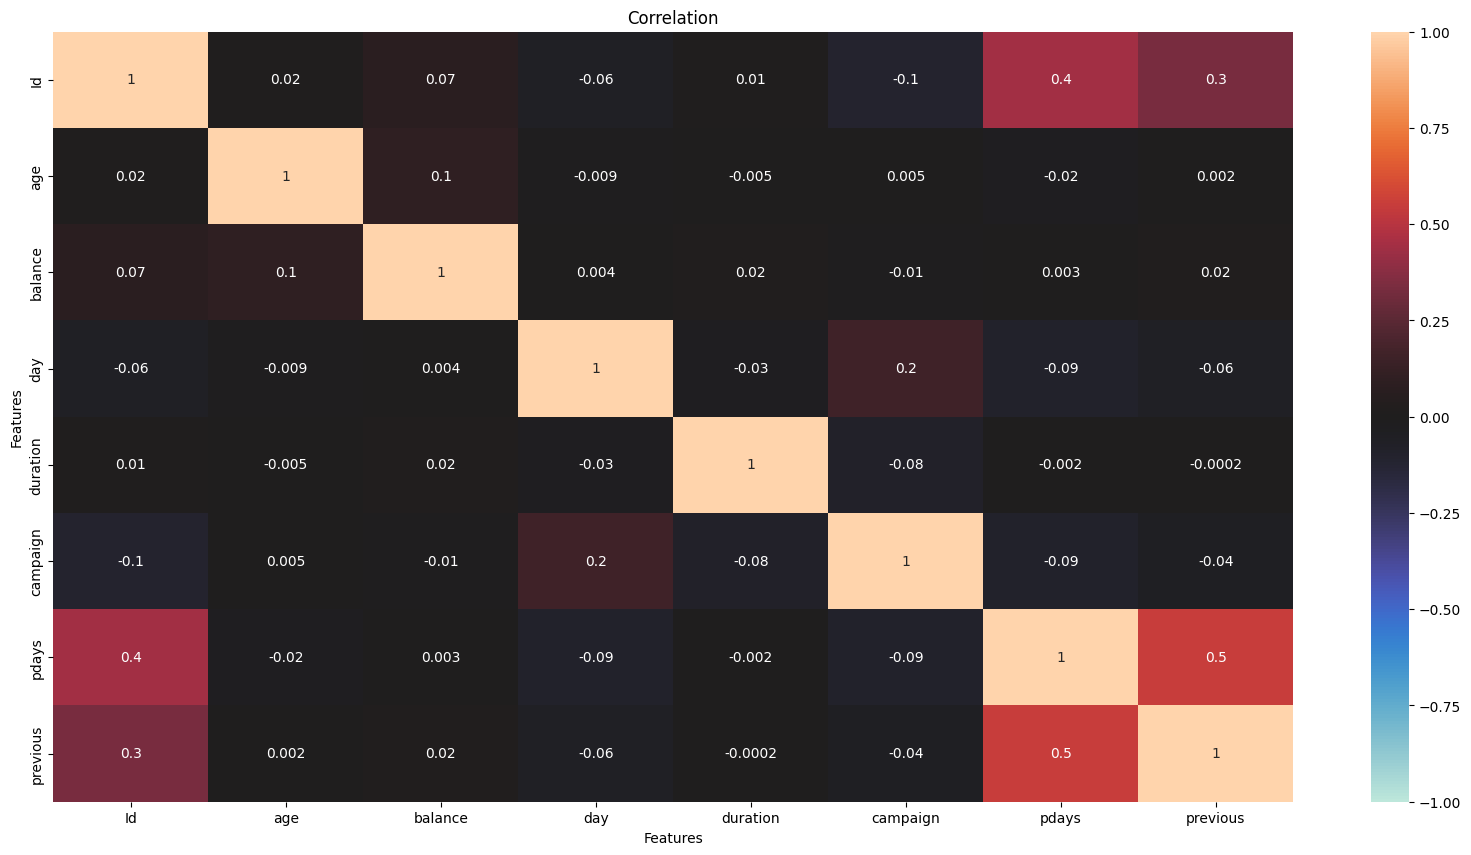

In [109]:
# Assuming 'numeric_cols' is a list of the numeric columns in your dataset
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.heatmap(data[numeric_cols].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0)
plt.title("Correlation", y=1)
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()

The dataset was prepared for analysis and modeling with the following steps:

1. Identified categorical and numerical columns.
2. Converted the 'pdays' column into a categorical variable, treating -1 as no previous call.
3. Encoded the target variable 'y' into binary format.
4. Applied one-hot encoding to categorical columns using pd.get_dummies().

These actions ensure the dataset is appropriately formatted for further analysis and predictive modeling.

In [110]:
# list categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome', 'pdays']

# list numerical columns
num_cols = ['duration', 'balance', 'campaign','day', 'age', 'previous']

In [111]:
# making pdays as Categorical (-1 no call)
data.pdays = pd.Categorical(data.pdays)

In [112]:
# Y into 1 and 0
data['y'] = (data.y == 'yes').astype('int')

In [113]:
# Dummies
data = pd.get_dummies(data)
data.head()

,Id,age,balance,day,duration,campaign,previous,y,job_admin.,job_blue-collar,...,pdays_831,pdays_838,pdays_842,pdays_850,pdays_854,pdays_871,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1002,44.0,29.0,5,151,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1003,33.0,2.0,5,76,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1004,47.0,1506.0,5,92,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1005,33.0,1.0,5,198,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1006,35.0,231.0,5,139,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


The numerical columns in the dataset were rescaled using StandardScaler to ensure consistent scaling across features. After scaling, the rescaled numerical columns were combined with the categorical columns.

Unnecessary numerical columns were dropped, and the scaled numerical columns were concatenated with the remaining data.

The resulting dataset, containing both scaled numerical features and categorical features, is now ready for further analysis and modeling.

In [114]:
# rescale our numerical columns
scaler = StandardScaler()
scaler.fit(data[num_cols])
data_scaled = scaler.transform(data[num_cols])
columns_value_new = data[num_cols].columns
data_scaled_ok = pd.DataFrame(data_scaled, columns = columns_value_new)
data_scaled_ok.head(10)

,duration,balance,campaign,day,age,previous
0,-0.416121,-0.437933,-0.56945,-1.298959,0.288558,-0.307445
1,-0.707438,-0.446799,-0.56945,-1.298959,-0.747420,-0.307445
2,-0.645290,0.047080,-0.56945,-1.298959,0.571098,-0.307445
3,-0.233563,-0.447127,-0.56945,-1.298959,-0.747420,-0.307445
4,-0.462732,-0.371601,-0.56945,-1.298959,-0.559061,-0.307445
5,-0.159763,-0.300671,-0.56945,-1.298959,-1.218320,-0.307445
6,-0.140341,-0.358794,-0.56945,-1.298959,0.006019,-0.307445
7,-0.470500,-0.319389,-0.56945,-1.298959,-1.124140,-0.307445
8,1.005504,-0.445485,-0.56945,-1.298959,1.136177,-0.307445
9,-0.726859,-0.424141,-0.56945,-1.298959,1.607076,-0.307445


In [115]:
# Now we need to combite all tables
# We will remove not nessasaries num cols
data1 = data.drop(num_cols, axis =1)
result = pd.concat([data_scaled_ok, data1], axis=1, join='inner')
display(result)

,duration,balance,campaign,day,age,previous,Id,y,job_admin.,job_blue-collar,...,pdays_831,pdays_838,pdays_842,pdays_850,pdays_854,pdays_871,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.416121,-0.437933,-0.569450,-1.298959,0.288558,-0.307445,1002,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.707438,-0.446799,-0.569450,-1.298959,-0.747420,-0.307445,1003,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.645290,0.047080,-0.569450,-1.298959,0.571098,-0.307445,1004,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.233563,-0.447127,-0.569450,-1.298959,-0.747420,-0.307445,1005,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.462732,-0.371601,-0.569450,-1.298959,-0.559061,-0.307445,1006,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45187,2.792246,-0.176545,0.076029,0.143069,0.947817,-0.307445,46207,1,0,0,...,0,0,0,0,0,0,0,0,0,1
45188,0.768566,0.120308,-0.246711,0.143069,2.831415,-0.307445,46208,1,0,0,...,0,0,0,0,0,0,0,0,0,1
45189,3.374879,1.429217,0.721507,0.143069,2.925595,1.308769,46209,1,0,0,...,0,0,0,0,0,0,0,0,1,0
45190,0.970546,-0.228100,0.398768,0.143069,1.512897,-0.307445,46210,0,0,1,...,0,0,0,0,0,0,0,0,0,1


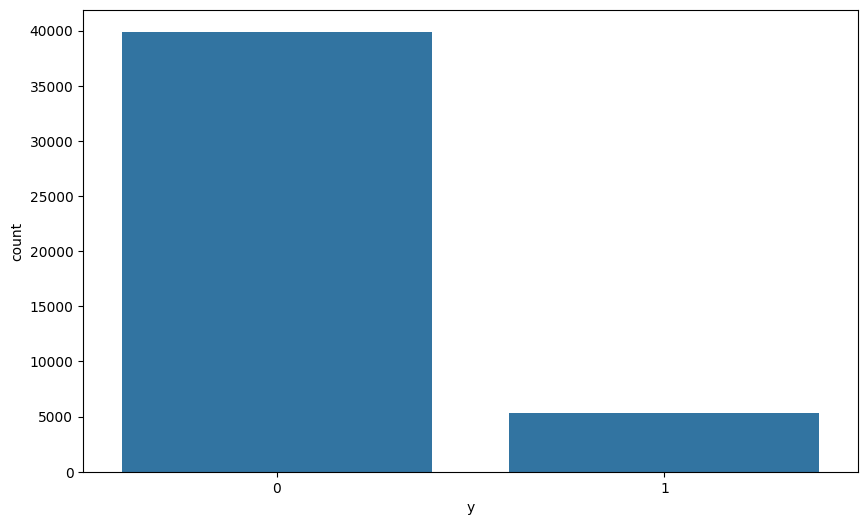

In [116]:
# Chosing target and dropin target and not impotant variables
newdata = result.drop(columns=['y'])
target = result.filter(['y'], axis =1)

# Split data on 70/30
X_train,X_test,y_train,y_test = train_test_split(newdata,target,test_size = 0.3,random_state=10)

# Plot to check inbalance
sns.countplot(x ='y', data = result)
plt.show()

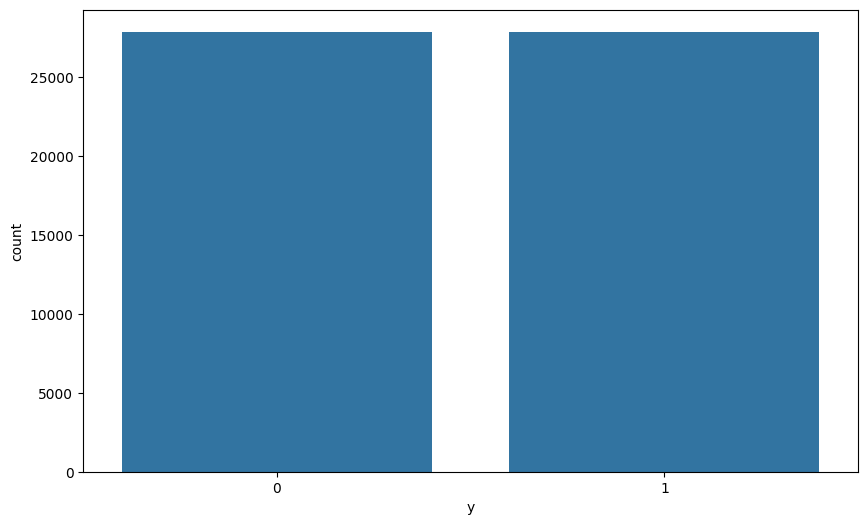

In [117]:
# creating an instance
sm = SMOTE(random_state=27)
# applying it to the training set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Recheck inbalance
sns.countplot(x ='y', data = y_train_smote)
plt.show()

In [118]:
# We will need to drop first ID to have more clear
# prediction and in the end keep it back
X_train_smote_no_ID = X_train_smote.drop(['Id'], axis = 1)
X_test_no_ID = X_test.drop(['Id'], axis = 1)

1. The target variable 'y' was separated from the dataset, and non-essential variables were dropped to form a new dataset.
2. The data was split into training and testing sets with a 70/30 ratio using train_test_split.
3. A countplot was generated to visualize the class distribution of the target variable, revealing potential class imbalance.
4. To address class imbalance, Synthetic Minority Over-sampling Technique (SMOTE) was applied to the training set to generate synthetic samples for the minority class.
5. Another countplot was created to confirm the balance after applying SMOTE.
6. As part of the preprocessing, the 'ID' column was dropped to enhance prediction clarity, and it will be added back later.

The dataset is now ready for further analysis and model training, with appropriate handling of class imbalance and non-essential variables.

# Decision Tree Algorithm

In [119]:
class DecisionTree:
    def __init__(self, max_depth=None, criterion='gini'):
        """
        Initialize a decision tree classifier.

        Parameters:
        - max_depth (int or None): Maximum depth of the decision tree. If None, the tree grows until all leaves are pure or until all leaves contain less than min_samples_split samples.
        - criterion (str): The function to measure the quality of a split. Supported criteria are 'gini' for the Gini impurity and 'entropy' for the information gain.

        Attributes:
        - max_depth (int or None): Maximum depth of the decision tree.
        - criterion (str): The function to measure the quality of a split.
        - tree: The decision tree model.
        - feature_names (list or None): Names of features. Initialized as None.
        """
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None
        self.feature_names = None  # Initialize feature names

    def calculate_gini(self, labels):
        """
        Calculate Gini impurity.

        Parameters:
        - labels (array-like): Labels for the samples.

        Returns:
        - gini (float): Gini impurity.
        """
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def calculate_entropy(self, labels):
        """
        Calculate entropy.

        Parameters:
        - labels (array-like): Labels for the samples.

        Returns:
        - entropy (float): Entropy.
        """
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def find_best_split(self, X, y):
        """
        Find the best split for the decision tree.

        Parameters:
        - X (array-like): Input features.
        - y (array-like): Labels for the samples.

        Returns:
        - best_feature (int): Index of the best feature.
        - best_value (float): Value of the best split.
        """
        num_features = X.shape[1]
        if self.criterion == 'gini':
            best_measure = float('inf')
            measure_function = self.calculate_gini
        elif self.criterion == 'entropy':
            best_measure = float('inf')  # Adjusted initialization for entropy
            measure_function = self.calculate_entropy
        else:
            raise ValueError("Invalid criterion. Supported criteria: 'gini', 'entropy'")

        best_feature = None
        best_value = None

        for feature in range(num_features):
            unique_values = np.unique(X[:, feature])
            for value in unique_values:
                left_mask = X[:, feature] <= value
                right_mask = ~left_mask

                left_measure = measure_function(y[left_mask])
                right_measure = measure_function(y[right_mask])

                total_measure = (len(y[left_mask]) * left_measure + len(y[right_mask]) * right_measure) / len(y)

                if self.criterion == 'gini':
                    if total_measure < best_measure:
                        best_measure = total_measure
                        best_feature = feature
                        best_value = value
                elif self.criterion == 'entropy':
                    if total_measure < best_measure:  # Adjusted comparison for entropy
                        best_measure = total_measure
                        best_feature = feature
                        best_value = value

        return best_feature, best_value

    def build_tree(self, X, y, depth):
        """
        Recursively build the decision tree.

        Parameters:
        - X (array-like): Input features.
        - y (array-like): Labels for the samples.
        - depth (int): Current depth of the tree.

        Returns:
        - node: The constructed node or leaf.
        """
        if depth == 0 or len(np.unique(y)) == 1 or len(y) == 0:
            # If depth is zero, or all labels are the same, or no labels are present
            # return the most frequent label or handle other appropriate termination
            if len(y) == 0:
                # If no labels are present, return a default value (for example, -1)
                return -1
            else:
                # Return the most frequent label
                return np.bincount(y).argmax()

        best_feature, best_value = self.find_best_split(X, y)
        if best_feature is None:
            return np.bincount(y).argmax()

        left_mask = X[:, best_feature] <= best_value
        right_mask = ~left_mask

        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth - 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth - 1)

        return (best_feature, best_value, left_subtree, right_subtree)

    def fit(self, X, y):
        """
        Fit the decision tree classifier.

        Parameters:
        - X (array-like): Input features.
        - y (array-like): Labels for the samples.
        """
        self.tree = self.build_tree(X, y, self.max_depth)

    def predict_instance(self, instance):
        """
        Predict the class of a single instance.

        Parameters:
        - instance (array-like): Input features for a single instance.

        Returns:
        - node: The predicted class or subtree.
        """
        node = self.tree
        while isinstance(node, tuple):
            feature, value, left_subtree, right_subtree = node
            if instance[feature] <= value:
                node = left_subtree
            else:
                node = right_subtree
        return node

    def predict(self, X):
        """
        Predict the classes of multiple instances.

        Parameters:
        - X (array-like): Input features.

        Returns:
        - predictions (array-like): Predicted classes.
        """
        return np.array([self.predict_instance(instance) for instance in X])

    def mse(self, y_true, y_pred):
        """
        Compute Mean Squared Error.

        Parameters:
        - y_true (array-like): True labels.
        - y_pred (array-like): Predicted labels.

        Returns:
        - mse (float): Mean Squared Error.
        """
        n = len(y_true)
        mse = np.sum((y_true - y_pred) ** 2) / n
        return mse

    def accuracy(self, y_true, y_pred):
        """
        Compute accuracy.

        Parameters:
        - y_true (array-like): True labels.
        - y_pred (array-like): Predicted labels.

        Returns:
        - accuracy (float): Accuracy.
        """
        correct = np.sum(y_true == y_pred)
        total = len(y_true)
        accuracy = correct / total
        return accuracy

    def evaluate(self, X, y, metric='accuracy'):
        """
        Evaluate the performance of the model.

        Parameters:
        - X (array-like): Input features.
        - y (array-like): True labels for the samples.
        - metric (str): Metric for evaluation. Supported metrics: 'mse' (mean squared error), 'accuracy'.

        Returns:
        - error (float): Evaluation result.
        """
        predictions = self.predict(X)
        if metric == 'mse':
            error = self.mse(y, predictions)
        elif metric == 'accuracy':
            error = self.accuracy(y, predictions)
        else:
            raise ValueError("Invalid metric. Supported metrics: 'mse', 'accuracy'")
        return error

    def cross_validate(self, X, y, n_splits=5, metric='accuracy'):
        """
        Perform cross-validation and return the average evaluation result.

        Parameters:
        - X (array-like): Input features.
        - y (array-like): True labels for the samples.
        - n_splits (int): Number of splits for cross-validation.
        - metric (str): Metric for evaluation. Supported metrics: 'mse' (mean squared error), 'accuracy'.

        Returns:
        - avg_score (float): Average evaluation result across folds.
        """
        num_samples = len(X)
        fold_size = num_samples // n_splits
        scores = []

        for i in range(n_splits):
            start_index = i * fold_size
            end_index = (i + 1) * fold_size if i < n_splits - 1 else num_samples

            X_train = np.concatenate([X[:start_index], X[end_index:]])
            y_train = np.concatenate([y[:start_index], y[end_index:]])
            X_test = X[start_index:end_index]
            y_test = y[start_index:end_index]

            self.fit(X_train, y_train)
            score = self.evaluate(X_test, y_test, metric=metric)
            scores.append(score)

        avg_score = np.mean(scores)
        return avg_score

    def print_tree(self):
        """
        Print the decision tree structure.
        """
        if self.feature_names is None:
            raise ValueError("Feature names are not set. Please set feature_names attribute before printing the tree.")
        self._print_tree_recursive(self.tree, depth=0)

    def _print_tree_recursive(self, node, depth):
        """
        Recursively print the decision tree structure.

        Parameters:
        - node: The current node or subtree.
        - depth (int): Current depth of the tree.
        """
        if isinstance(node, tuple):
            feature, value, left_subtree, right_subtree = node
            feature_name = self.feature_names[feature]
            print("  " * depth + f"{feature_name} <= {value}")
            self._print_tree_recursive(left_subtree, depth + 1)
            print("  " * depth + f"{feature_name} > {value}")
            self._print_tree_recursive(right_subtree, depth + 1)
        else:
            print("  " * depth + f"Class: {node}")

    def export_graphviz(self):
        """
        Export the decision tree in Graphviz format.
        """
        if self.feature_names is None:
            raise ValueError("Feature names are not set. Please set feature_names attribute before exporting the tree.")

        def build_graphviz_tree(node, dot_data):
            """
            Recursively build the decision tree in Graphviz format.

            Parameters:
            - node: The current node or subtree.
            - dot_data: Graphviz object to build the tree.

            Returns:
            - node: The current node or leaf.
            """
            if isinstance(node, tuple):
                feature, value, left_subtree, right_subtree = node
                feature_name = self.feature_names[feature]
                dot_data.node(str(node), f"{feature_name} <= {value}")
                left_child = build_graphviz_tree(left_subtree, dot_data)
                right_child = build_graphviz_tree(right_subtree, dot_data)
                dot_data.edge(str(node), str(left_child), 'True')
                dot_data.edge(str(node), str(right_child), 'False')
            else:
                dot_data.node(str(node), f"Class: {node}")
            return node

        dot_data = graphviz.Digraph(comment='Decision Tree')
        build_graphviz_tree(self.tree, dot_data)
        display(dot_data)


In [120]:
# Assuming you have X_train, X_test, y_train, y_test as pandas DataFrames
# Convert them to NumPy arrays before using the DecisionTree class
X_train_np = X_train_smote_no_ID.to_numpy()
y_train_np = y_train_smote.values.flatten()  # Convert to 1D array
X_test_np = X_test_no_ID.to_numpy()
y_test_np = y_test.values.flatten()    # Convert to 1D array

# Define feature names
feature_names = X_train_smote_no_ID.columns.tolist()

## Creating a tree with a depth of 3 and using the entropy

In [121]:
# Train the model on the training set
dt1 = DecisionTree(max_depth=3, criterion='entropy')
dt1.feature_names = feature_names  # Set feature names
dt1.fit(X_train_np, y_train_np)

In [122]:
# Evaluate the model on the testing set
accuracy1 = dt1.evaluate(X_test_np, y_test_np, metric='accuracy')
mse_error1 = dt1.evaluate(X_test_np, y_test_np, metric='mse')

# Print the results
print(f'Mean Squared Error: {mse_error1}')
print(f'Accuracy: {accuracy1}')

Mean Squared Error: 0.2048237203127305
Accuracy: 0.7951762796872696


In [123]:
# Print the decision tree
print("Decision Tree1:")
dt1.print_tree()

Decision Tree1:
duration <= -0.1869520528478309
  housing_yes <= 0.0
    housing_no <= 0.0
      Class: 1
    housing_no > 0.0
      Class: 0
  housing_yes > 0.0
    month_may <= 0.0
      Class: 0
    month_may > 0.0
      Class: 0
duration > -0.1869520528478309
  housing_yes <= 0.0
    housing_no <= 0.0
      Class: 1
    housing_no > 0.0
      Class: 1
  housing_yes > 0.0
    duration <= 0.9705459495111647
      Class: 0
    duration > 0.9705459495111647
      Class: 1


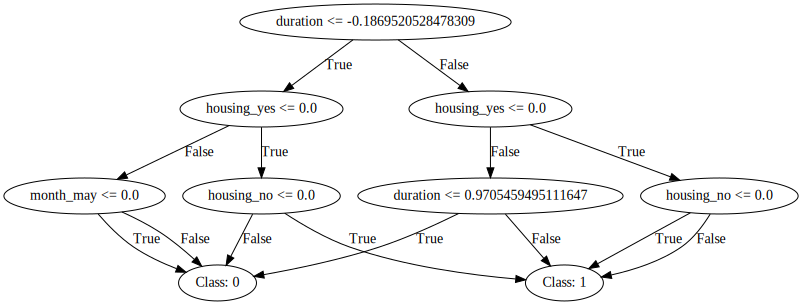

In [124]:
# Visualize the tree
dt1.export_graphviz()

In [125]:
avg_accuracy1 = dt1.cross_validate(newdata.to_numpy(),target.values.flatten(), n_splits=5, metric='accuracy')
print("Average accuracy:", avg_accuracy1)

Average accuracy: 0.8816024132130416


## Creating a tree with a depth of 3 and using the gini

In [126]:
# Train the model on the training set
dt2 = DecisionTree(max_depth=3, criterion='gini')
dt2.feature_names = feature_names  # Set feature names
dt2.fit(X_train_np, y_train_np)

# Evaluate the model on the testing set
accuracy2 = dt2.evaluate(X_test_np, y_test_np, metric='accuracy')
mse_error2 = dt2.evaluate(X_test_np, y_test_np, metric='mse')

# Print the results
print(f'Mean Squared Error: {mse_error2}')
print(f'Accuracy: {accuracy2}')

Mean Squared Error: 0.2279097211978168
Accuracy: 0.7720902788021832


In [127]:
# Print the decision tree
print("Decision Tree2:")
dt2.print_tree()

Decision Tree2:
duration <= -0.1869520528478309
  poutcome_unknown <= 0.0
    poutcome_failure <= 0.0
      Class: 1
    poutcome_failure > 0.0
      Class: 0
  poutcome_unknown > 0.0
    month_mar <= 0.0
      Class: 0
    month_mar > 0.0
      Class: 1
duration > -0.1869520528478309
  housing_yes <= 0.0
    previous <= -0.30744506370077307
      Class: 1
    previous > -0.30744506370077307
      Class: 1
  housing_yes > 0.0
    duration <= 0.9705459495111647
      Class: 0
    duration > 0.9705459495111647
      Class: 1


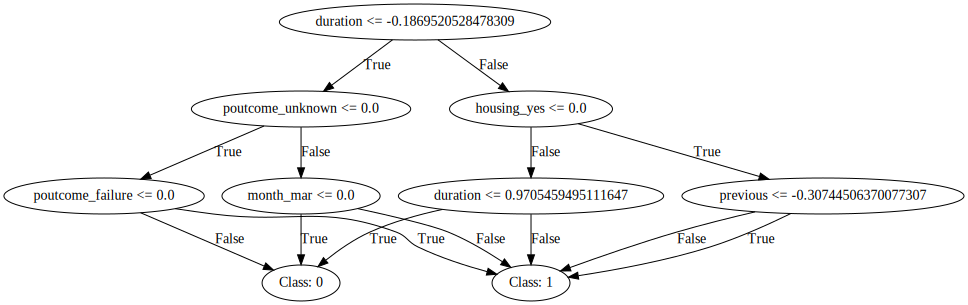

In [128]:
# Visualize the tree
dt2.export_graphviz()

In [129]:
avg_accuracy2 = dt2.cross_validate(newdata.to_numpy(),target.values.flatten(), n_splits=5, metric='accuracy')
print("Average accuracy:", avg_accuracy2)

Average accuracy: 0.8922455874606137


## Creating a tree with a depth of 5 and using the entropy

In [130]:
# Train the model on the training set
dt3 = DecisionTree(max_depth=5, criterion='entropy')
dt3.feature_names = feature_names  # Set feature names
dt3.fit(X_train_np, y_train_np)

# Evaluate the model on the testing set
accuracy3 = dt3.evaluate(X_test_np, y_test_np, metric='accuracy')
mse_error3 = dt3.evaluate(X_test_np, y_test_np, metric='mse')

# Print the results
print(f'Mean Squared Error: {mse_error3}')
print(f'Accuracy: {accuracy3}')

Mean Squared Error: 0.12892757043811773
Accuracy: 0.8710724295618822


In [131]:
# Print the decision tree
print("Decision Tree3:")
dt3.print_tree()

Decision Tree3:
duration <= -0.1869520528478309
  housing_yes <= 0.0
    housing_no <= 0.0
      Class: 1
    housing_no > 0.0
      poutcome_unknown <= 0.0
        poutcome_failure <= 0.0
          Class: 1
        poutcome_failure > 0.0
          Class: 0
      poutcome_unknown > 0.0
        duration <= -0.5986795301970038
          Class: 0
        duration > -0.5986795301970038
          Class: 0
  housing_yes > 0.0
    month_may <= 0.0
      duration <= -0.5132266575396283
        month_mar <= 0.0
          Class: 0
        month_mar > 0.0
          Class: 0
      duration > -0.5132266575396283
        previous <= -0.30744506370077307
          Class: 0
        previous > -0.30744506370077307
          Class: 0
    month_may > 0.0
      day <= -0.21743801216916223
        pdays_346 <= 0.0
          Class: 0
        pdays_346 > 0.0
          Class: 0
      day > -0.21743801216916223
        contact_unknown <= 0.0
          Class: 0
        contact_unknown > 0.0
          Class: 0
d

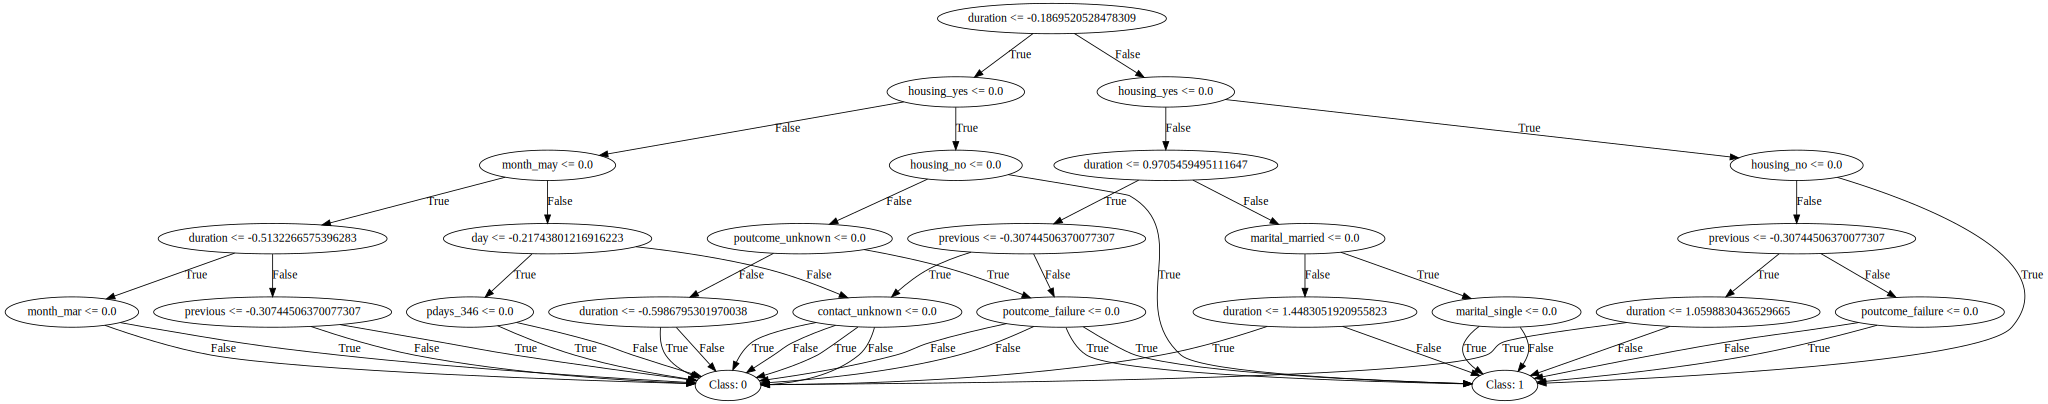

In [132]:
# Visualize the tree
dt3.export_graphviz()

In [133]:
avg_accuracy3 = dt3.cross_validate(newdata.to_numpy(),target.values.flatten(), n_splits=5, metric='accuracy')
print("Average accuracy:", avg_accuracy3)

Average accuracy: 0.8913605827509024


## Creating a tree with a depth of 5 and using the gini

In [134]:
# Train the model on the training set
dt4 = DecisionTree(max_depth=5, criterion='gini')
dt4.feature_names = feature_names  # Set feature names
dt4.fit(X_train_np, y_train_np)

# Evaluate the model on the testing set
accuracy4 = dt4.evaluate(X_test_np, y_test_np, metric='accuracy')
mse_error4 = dt4.evaluate(X_test_np, y_test_np, metric='mse')

# Print the results
print(f'Mean Squared Error: {mse_error4}')
print(f'Accuracy: {accuracy4}')

Mean Squared Error: 0.13836849092786546
Accuracy: 0.8616315090721345


In [137]:
# Print the decision tree
print("Decision Tree4:")
dt4.print_tree()

Decision Tree4:
duration <= -0.1869520528478309
  poutcome_unknown <= 0.0
    poutcome_failure <= 0.0
      poutcome_other <= 0.0
        poutcome_success <= 0.0
          Class: 1
        poutcome_success > 0.0
          Class: 1
      poutcome_other > 0.0
        month_jul <= 0.0
          Class: 0
        month_jul > 0.0
          Class: 0
    poutcome_failure > 0.0
      housing_yes <= 0.0
        housing_no <= 0.0
          Class: 1
        housing_no > 0.0
          Class: 0
      housing_yes > 0.0
        month_aug <= 0.0
          Class: 0
        month_aug > 0.0
          Class: 0
  poutcome_unknown > 0.0
    month_mar <= 0.0
      month_apr <= 0.0
        month_oct <= 0.0
          Class: 0
        month_oct > 0.0
          Class: 1
      month_apr > 0.0
        housing_yes <= 0.0
          Class: 1
        housing_yes > 0.0
          Class: 0
    month_mar > 0.0
      duration <= -0.6297533020724131
        balance <= -0.4460559906256907
          Class: 1
        balance > 

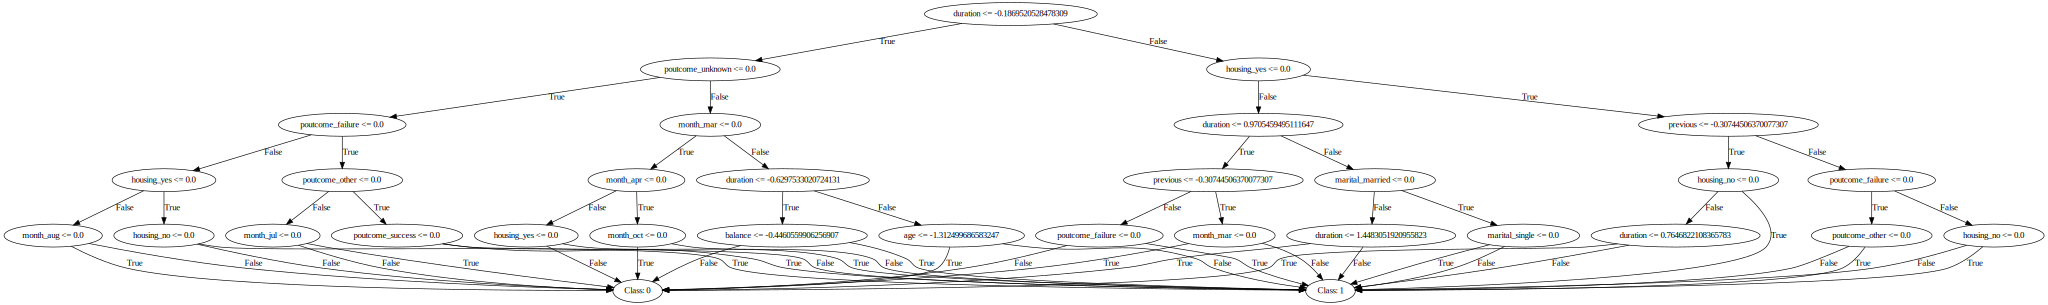

In [136]:
# Visualize the tree
dt4.export_graphviz()

In [138]:
avg_accuracy4 = dt4.cross_validate(newdata.to_numpy(),target.values.flatten(), n_splits=5, metric='accuracy')
print("Average accuracy:", avg_accuracy4)

Average accuracy: 0.8871121537970458
